In [1]:
import pandas as pd
import scanpy as sc
import scvelo as scv
import numpy as np
import matplotlib.pyplot as plt
import random
#import cellrank as cr

import os
import csv



In [2]:
outdir = "/data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6"
if not os.path.isdir(outdir):
    os.mkdir(outdir)

In [3]:
adata = scv.read("/data/proj/GCB_MB/bcd_CT/single-cell/results/multiple_modalities/ATAC_H3K27ac_H3K27me3/seurat_multimodal/peaks/scvelo/ATAC_H3K27ac/Seurat_object_OPC_MOL.h5ad")
adata

AnnData object with n_obs × n_vars = 527 × 3000
    obs: 'orig.ident', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_peaks', 'nFeature_peaks', 'X', 'barcode', 'total', 'duplicate', 'chimeric', 'unmapped', 'lowmapq', 'mitochondrial', 'nonprimary', 'passed_filters', 'is__cell_barcode', 'excluded_reason', 'TSS_fragments', 'DNase_sensitive_region_fragments', 'enhancer_region_fragments', 'promoter_region_fragments', 'on_target_fragments', 'blacklist_region_fragments', 'peak_region_fragments', 'peak_region_cutsites', 'logUMI', 'promoter_ratio', 'peak_region_ratio', 'all_unique_MB', 'peak_MB', 'peak_ratio_MB', 'sample', 'passedMB', 'passedMB_legacy', 'class', 'modality', 'nCount_GA', 'nFeature_GA', 'GA_snn_res.0.8', 'seurat_clusters', 'peaks_snn_res.0.8', 'orig_file', 'idents_L1', 'idents_L2', 'idents_L3', 'idents_short', 'nCount_spliced', 'nFeature_spliced', 'pt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8'
    var: 'features', 'spliced_features', 'unspliced_features'
    uns: 'neigh

... storing 'sample' as categorical
... storing 'modality' as categorical
... storing 'orig_file' as categorical
... storing 'idents_short' as categorical


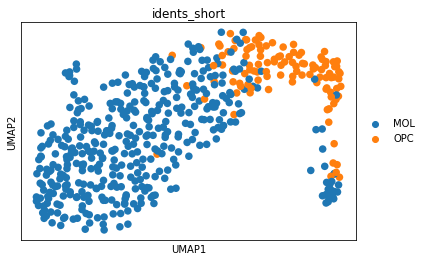

In [4]:
sc.pl.umap(adata,color='idents_short')

In [5]:
sc.pp.filter_genes(adata, min_cells=10)


In [6]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)


Normalized count data: spliced.
computing neighbors
    finished (0:00:16) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [7]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)


computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/56 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file /data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_UMAP_ATAC_K27ac.png


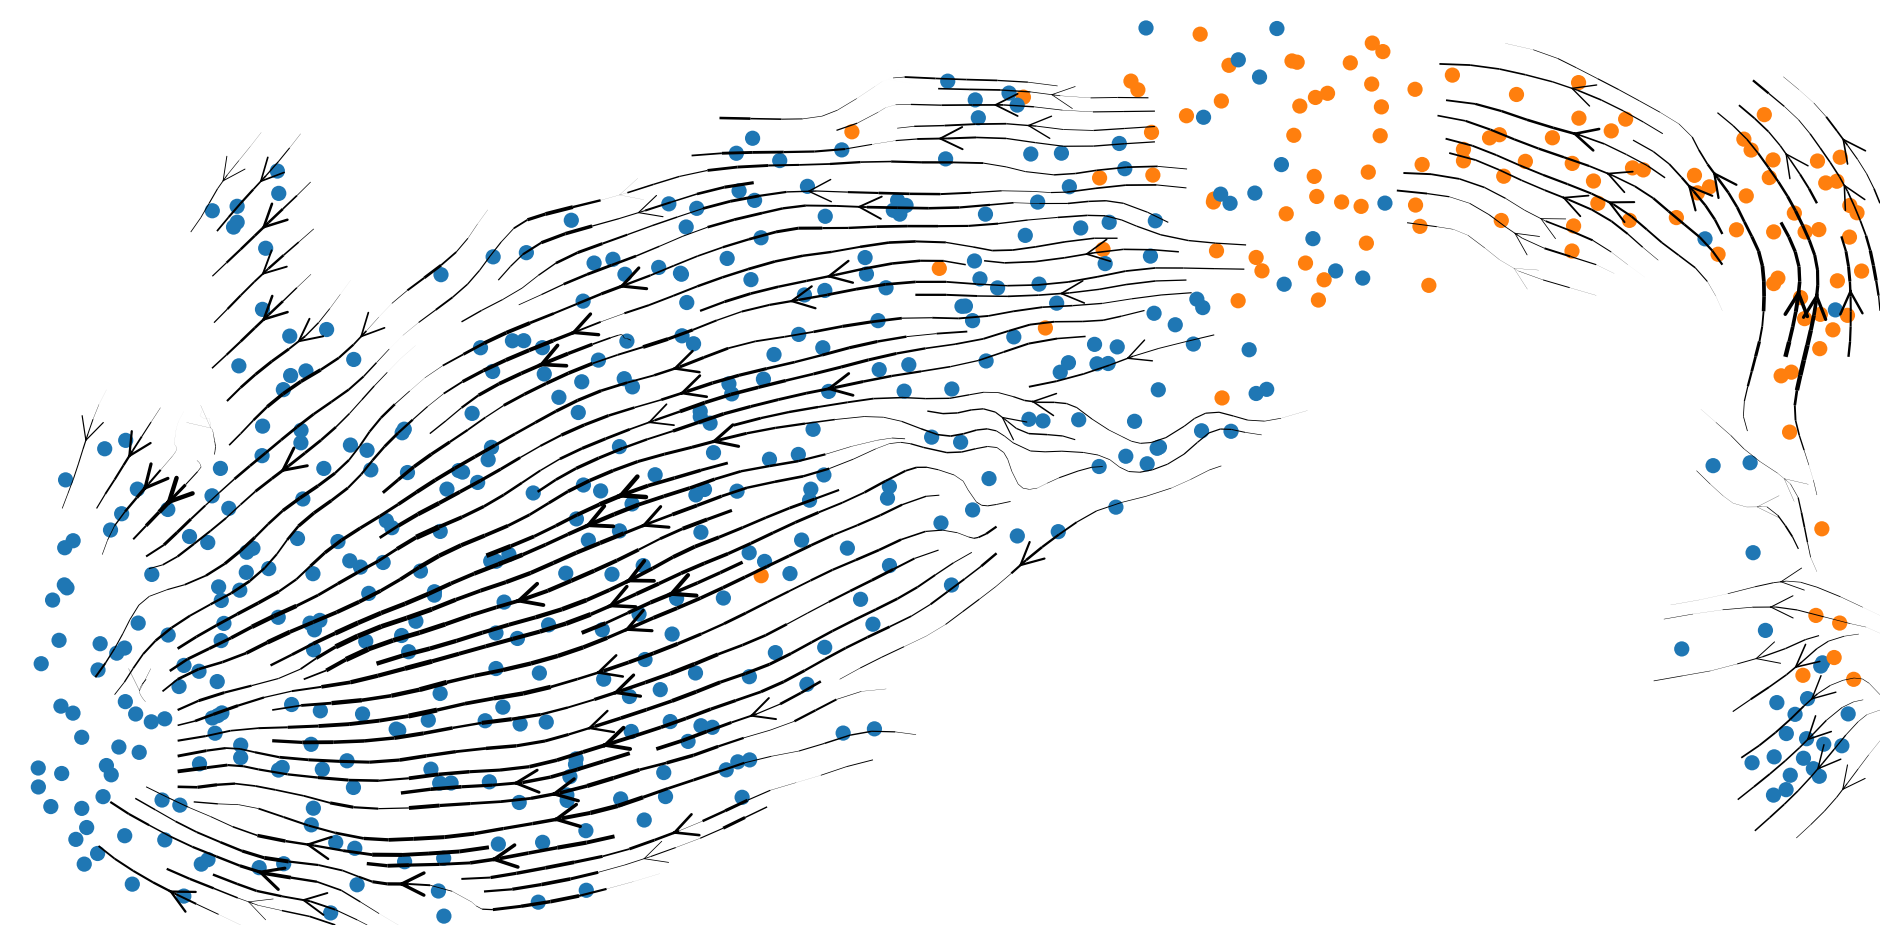

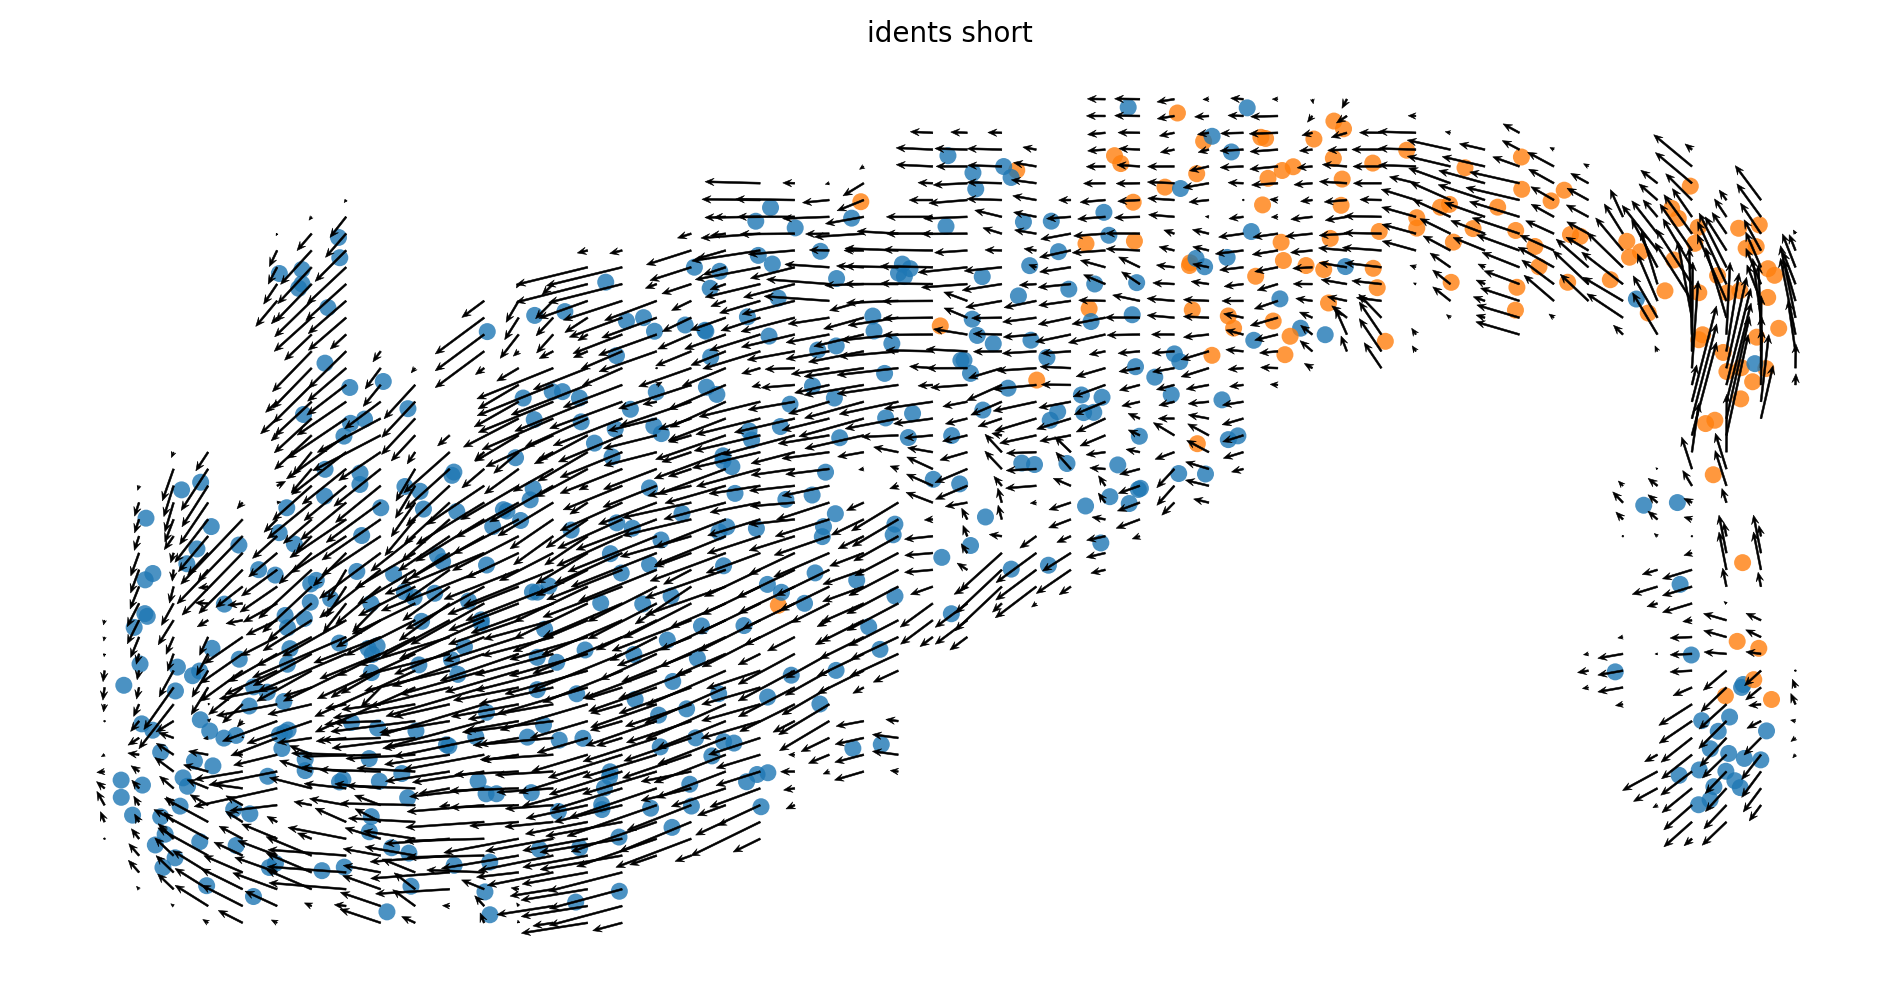

In [8]:
scv.pl.velocity_embedding_stream(adata,color='idents_short',size=120,arrow_size=2,arrow_style='->',figsize=[12,6],
                                  save='/data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_UMAP_ATAC_K27ac.png',
                                 legend_loc='none',title='',alpha=1,dpi=200)
scv.pl.velocity_embedding_grid(adata, dpi=200, arrow_size=0.8, 
                               arrow_length=8,color='idents_short',alpha=0.8,size=150,arrow_color='black',figsize=[12,6])



saving figure to file /data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_Mog.pdf


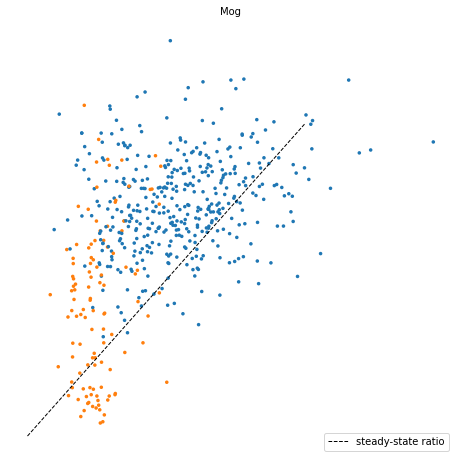

saving figure to file /data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_Mal.pdf


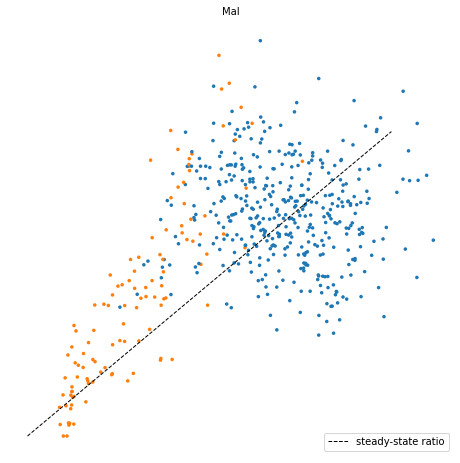

saving figure to file /data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_Slc24a2.pdf


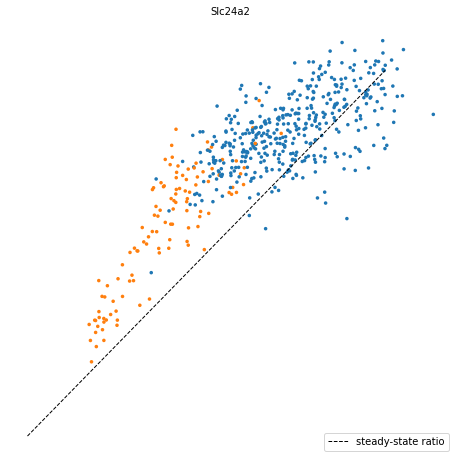

saving figure to file /data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_Slc45a3.pdf


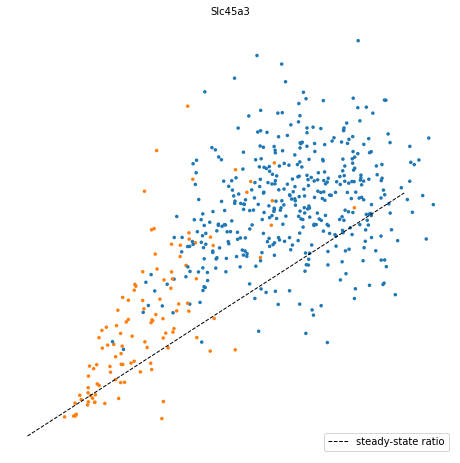

saving figure to file /data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_Ano4.pdf


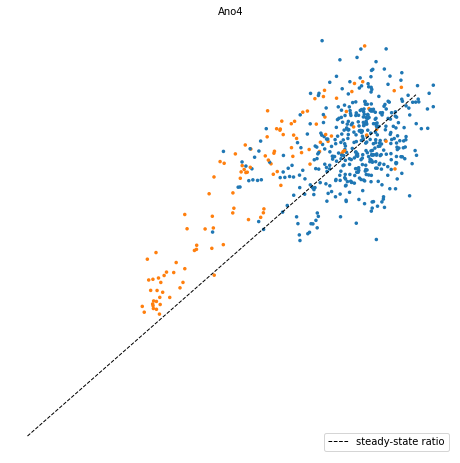

In [9]:
scv.pl.scatter(adata,basis='Mog',size=50,figsize=[8,8],frameon=False,save='/data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_Mog.pdf',color='idents_short')
scv.pl.scatter(adata,basis='Mal',size=50,figsize=[8,8],frameon=False,save='/data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_Mal.pdf',color='idents_short')
scv.pl.scatter(adata,basis='Slc24a2',size=50,figsize=[8,8],frameon=False,save='/data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_Slc24a2.pdf',color='idents_short')
scv.pl.scatter(adata,basis='Slc45a3',size=50,figsize=[8,8],frameon=False,save='/data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_Slc45a3.pdf',color='idents_short')
scv.pl.scatter(adata,basis='Ano4',size=50,figsize=[8,8],frameon=False,save='/data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_Ano4.pdf',color='idents_short')




In [10]:
scv.tl.recover_dynamics(adata)
scv.tl.latent_time(adata)



recovering dynamics (using 1/56 cores)
    finished (0:00:29) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


saving figure to file /data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/scVelo_latent_time.png


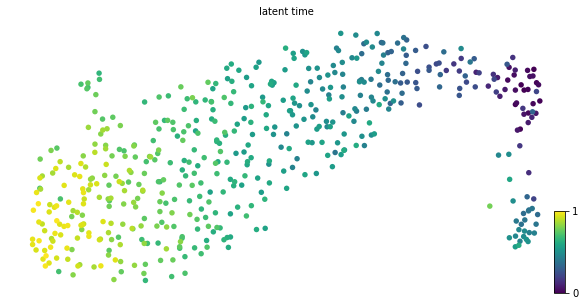

In [11]:
scv.pl.scatter(adata, color='latent_time', color_map='viridis', size=120,figsize=[10,5],
              save= '/data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/scVelo_latent_time.png')

top_genes = adata.var['fit_likelihood'].sort_valuesalues(ascending=False).index
scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, frameon=False,color='idents_short',figsize=[5,5],size=40)


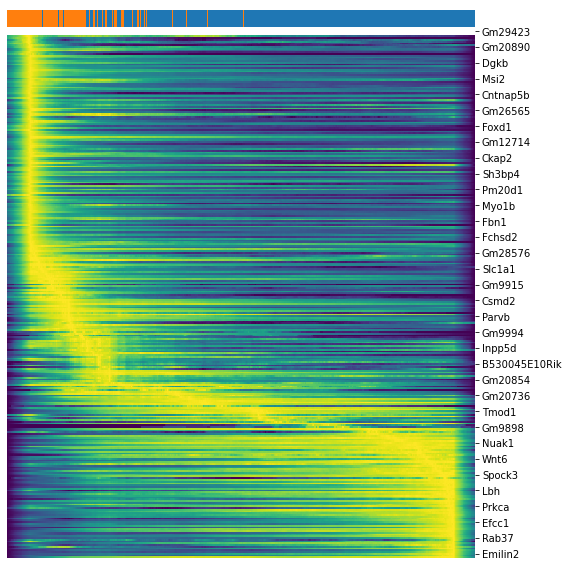

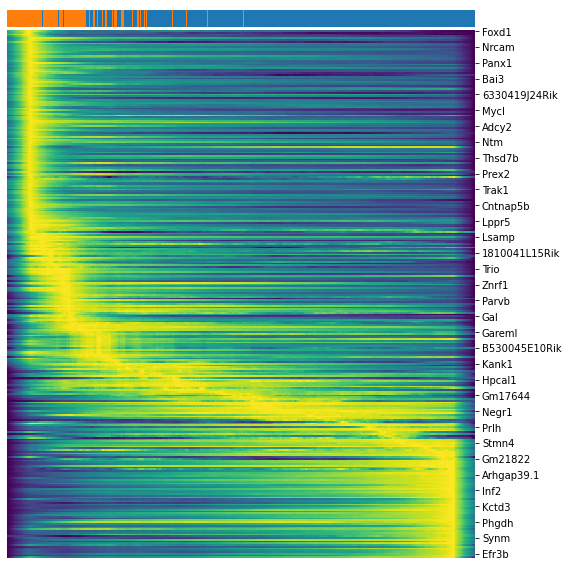

saving figure to file /data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_pseudotime_heatmap_unspliced.png


ValueError: 'bboxes' cannot be empty

<Figure size 576x576 with 5 Axes>

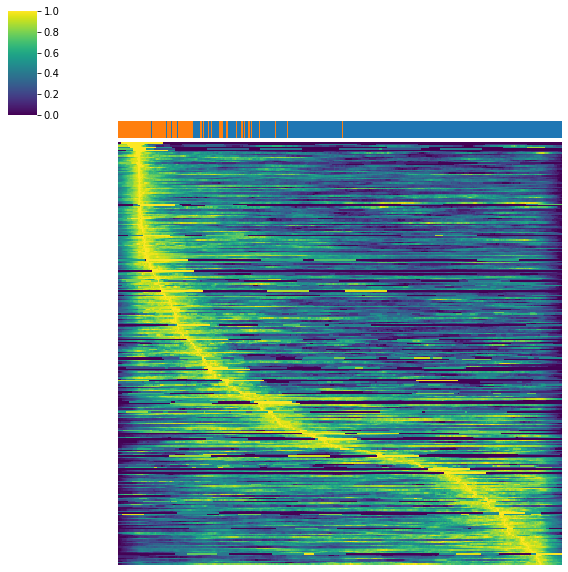

saving figure to file /data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_pseudotime_heatmap_spliced.png


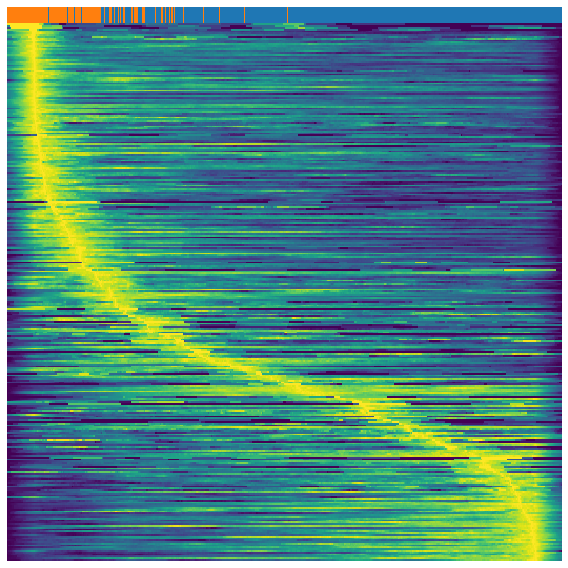

saving figure to file /data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_pseudotime_heatmap_velocity.png


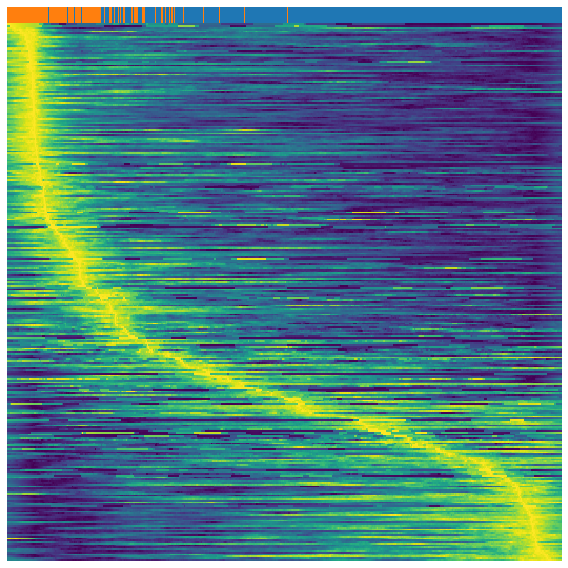

In [12]:
xkey = 'Ms'
tkey = 'latent_time'
n_convolve = 50
n_genes = 300

top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:n_genes]
# top_genes = random.sample(list(top_genes), n_genes)

var_names = top_genes

time = adata.obs[tkey].values
time = time[np.isfinite(time)]
df = pd.DataFrame(adata[:, var_names].layers[xkey][np.argsort(time)], columns=var_names)

max_sort = np.argsort(np.argmax(df.values, axis=0))

top_genes_sorted = top_genes[max_sort]

# Sorted individualy
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='idents_short', n_convolve=50,figsize=[8,8],layer='Mu')
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='idents_short', n_convolve=50,figsize=[8,8],layer='Ms')

# Custom sorting - follow the same order for all the heatmaps
scv.pl.heatmap(adata, var_names=top_genes_sorted, col_color='idents_short', n_convolve=50,figsize=[8,8],layer='unspliced',
               save = '/data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_pseudotime_heatmap_unspliced.png',yticklabels=False,
               colorbar=True,cbar_pos=(0.02, 0.1, 2, 0.5))
scv.pl.heatmap(adata, var_names=top_genes_sorted, col_color='idents_short', n_convolve=50,figsize=[8,8],layer='spliced',
              save = '/data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_pseudotime_heatmap_spliced.png',yticklabels=False)
scv.pl.heatmap(adata, var_names=top_genes_sorted, col_color='idents_short', n_convolve=50,figsize=[8,8],layer='Velocity',
              save = '/data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_pseudotime_heatmap_velocity.png',yticklabels=False)



saving figure to file /data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Top_driver_genes_scatter.png


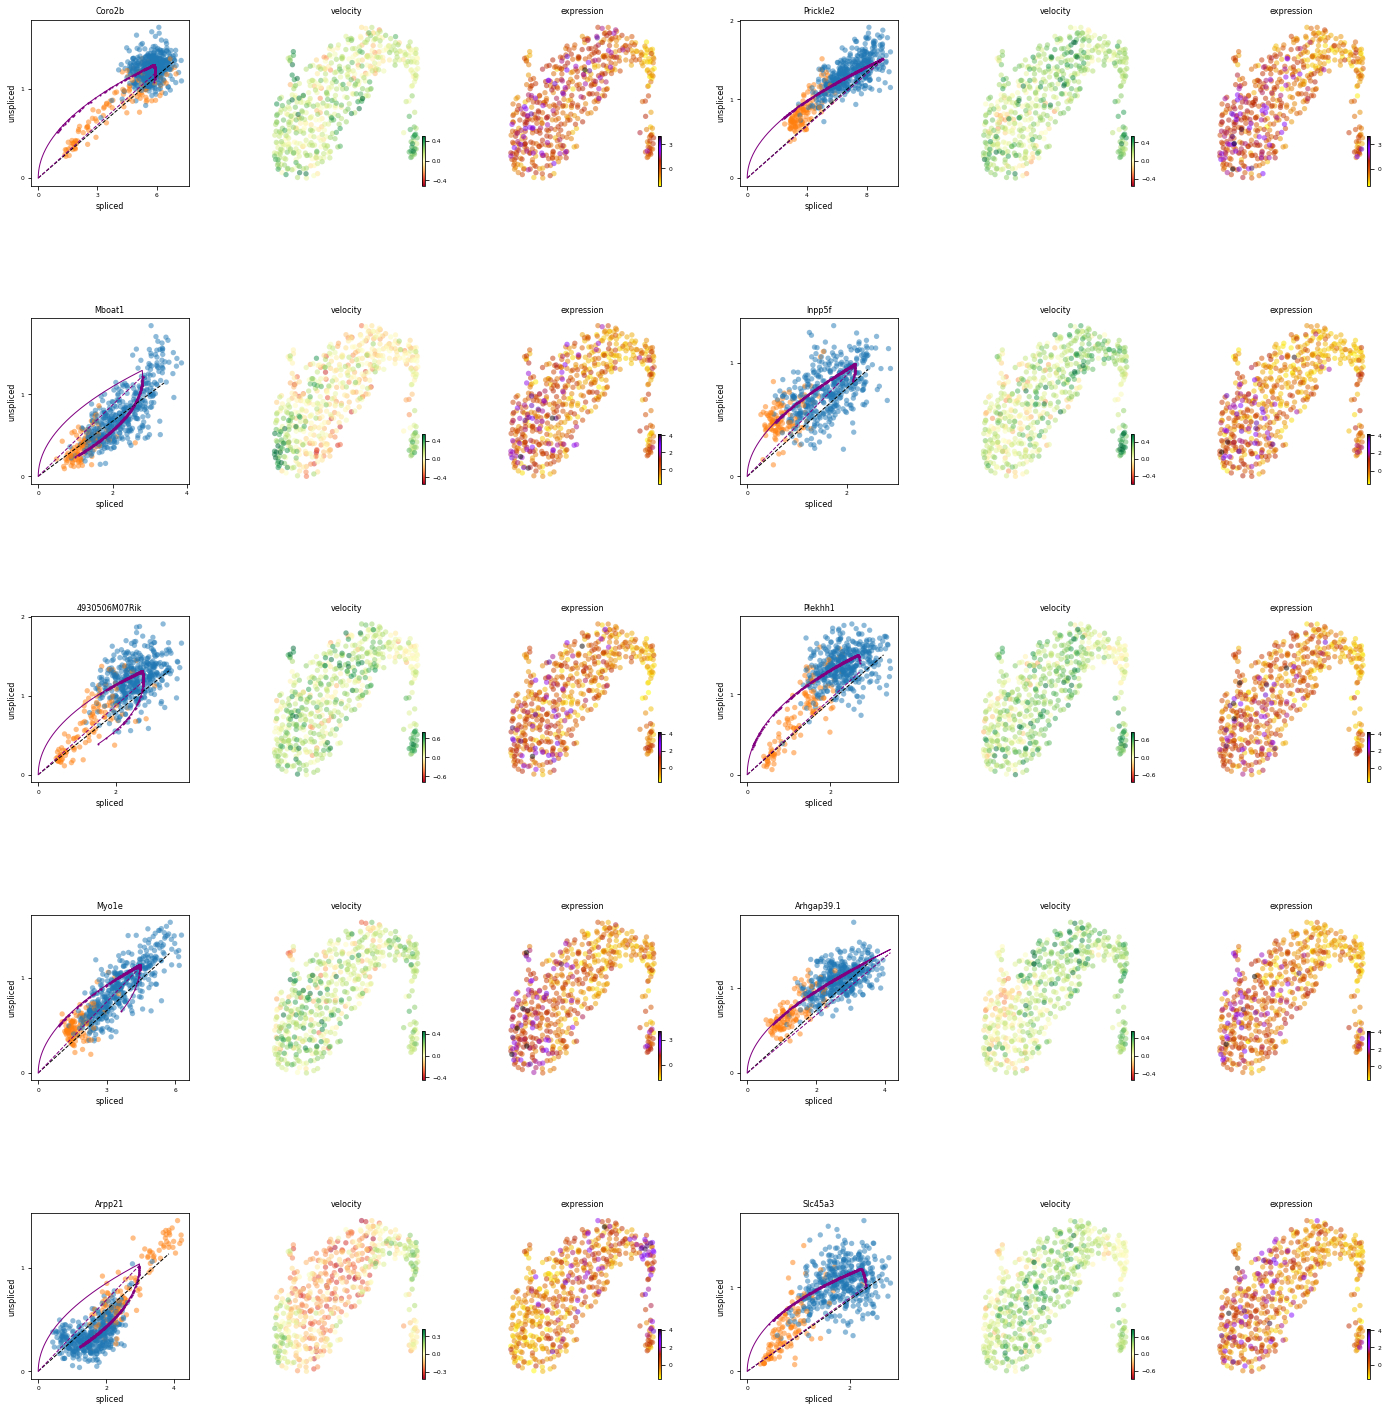

In [13]:
scv.pl.velocity(adata, var_names=top_genes[0:10], layers=['velocity', 'X'], perc=None, figsize=[8,10],color='idents_short',ncols=2,
                save = '/data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Top_driver_genes_scatter.png')
#scv.pl.velocity(adata,top_genes[:20],figsize=[10,10])


In [141]:
with open('/data/proj/GCB_MB/bcd_CT/single-cell/results/multiple_modalities/ATAC_H3K27ac_H3K27me3/seurat_multimodal/peaks/scvelo/ATAC_H3K27ac/top_genes.csv','w') as f:
    w = csv.writer(f)
    w.writerow(top_genes)

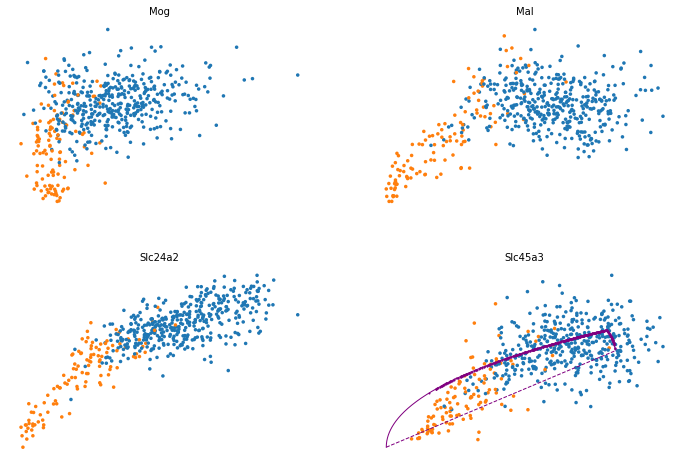

In [16]:
var_names = ['Mog', 'Mal', 'Slc24a2', 'Slc45a3']
scv.pl.scatter(adata, var_names, frameon=False,color='idents_short',size=50,ncols=2)




In [17]:
scv.tl.rank_dynamical_genes(adata, groupby='idents_short')
df = scv.get_df(adata, 'rank_dynamical_genes/names')
df.head(50)
df.to_csv('/data/proj/GCB_MB/bcd_CT/single-cell/results/multiple_modalities/ATAC_H3K27ac_H3K27me3/seurat_multimodal/peaks/scvelo/ATAC_H3K27ac/top_genes_per_cluster.csv')



ranking genes by cluster-specific likelihoods
    finished (0:00:01) --> added 
    'rank_dynamical_genes', sorted scores by group ids (adata.uns)


In [ ]:
adata = scv.read("/data/proj/GCB_MB/bcd_CT/single-cell/results/multiple_modalities/ATAC_H3K27ac_H3K27me3/seurat_multimodal/peaks/scvelo/H3K27me3_H3K27ac/Seurat_object_OPC_MOL.h5ad")
adata


In [ ]:
sc.pp.filter_genes(adata, min_cells=10)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)


In [ ]:
scv.pl.velocity_embedding_stream(adata,color='idents_short',size=120,arrow_size=2,arrow_style='->',figsize=[12,6],
                                  save='/data/proj/GCB_MB/bcd_CT/single-cell/results/figures/figure_6/Velocity_UMAP_K27me3_K27ac.png',
                                 legend_loc='none',title='',alpha=1,dpi=200)
scv.pl.velocity_embedding_grid(adata, dpi=200, arrow_size=0.8, 
                               arrow_length=8,color='idents_short',alpha=0.8,size=150,arrow_color='black',figsize=[12,6])

